<a href="https://colab.research.google.com/github/lastirembender/Data-Science-Handbook-Notes/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas NumPy gibi veri manipülasyonuna yarayan bir Python kütüphanesidir. NumPy'da ndarray veri yapıları varken Pandas'da DataFrames adlı yapıları vardır. DataFrames, satır ve sütunlardan oluşan ve genellikle heterojen türler ve / veya eksik veriler içeren çok boyutlu dizilerdir.

*Pandas kütüphanesi koda şu şekilde dahil edilir:*

In [1]:
import pandas as pd

In [3]:
import numpy as np

# Pandas Series tanımlama ve kullanımı

En basit haliyle Pandas nesneleri, satırların ve sütunların indeksler yerine etiketlerle tanımlandığı NumPy arraylerinin gelişmiş sürümleri olarak düşünülebilir.

*Bir Pandas series oluşturulurken şu işlem yapılır:*

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [ ]:
data.values #Series içindeki verilere ulaşırız

array([0.25, 0.5 , 0.75, 1.  ])

In [ ]:
data.index  #Series içindeki verilerin index değerlerine ulaşırız

RangeIndex(start=0, stop=4, step=1)

Pandas Series içindeki verilere NumPy arraylerde olduğu gibi ulaşılabilir

In [ ]:
data[1]

0.5

In [ ]:
data[1:3]

1    0.50
2    0.75
dtype: float64

Bir NumPy arrayde index değerlerini değiştiremezken Pandas Series'de index değerlerini örnekte olduğu gibi mümkünüdür

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

Index değerlerini değiştirdiğimiz için series içindeki herhangi bir değere ulaşmak istersem artık yeni index değerlerini kullanmak zorundayım.

In [ ]:
data['b']

0.5

Pandas Seriesleri Python'daki dictionary yapılarına benzetmemiz yanlış olmaz. Hatta sözlük yapılarını pandas series haline getirebiliriz

In [ ]:
dict={'Spock' : 17,
      'Kirk' : 19,
      'McCoy' : 20,
      'Scotty' : 15}
star_trek = pd.Series(dict)
star_trek

Spock     17
Kirk      19
McCoy     20
Scotty    15
dtype: int64

In [ ]:
star_trek["Spock"]

17

# Pandas DataFrame tanımlama ve kullanımı

DataFrame hem esnek satır indisleri hem de esnek sütun adlarına sahip iki boyutlu bir dizilerdir

Örneğin iki tane Pandas Series tanımlayıp bunlarla bir DataFrame oluşturalım

In [ ]:
work_year_dict={'Spock' : 17,
           'Kirk' : 19,
           'McCoy' : 20,
           'Scotty' : 15}
work_year = pd.Series(work_year_dict)
work_year                                    

Spock     17
Kirk      19
McCoy     20
Scotty    15
dtype: int64

In [ ]:
age_dict={'Spock' : 30,
      'Kirk' : 29,
      'McCoy' : 33,
      'Scotty' : 36}
age = pd.Series(age_dict)
age

Spock     30
Kirk      29
McCoy     33
Scotty    36
dtype: int64

In [ ]:
star_trek = pd.DataFrame({'work_year': work_year,
                          'age': age})
star_trek

,work_year,age
Spock,17,30
Kirk,19,29
McCoy,20,33
Scotty,15,36


In [ ]:
star_trek.index

Index(['Spock', 'Kirk', 'McCoy', 'Scotty'], dtype='object')

In [ ]:
star_trek.columns

Index(['work_year', 'age'], dtype='object')

Pandas Dataframe'lerin sütunlarının adını değiştirmek mümkün

In [ ]:
pd.DataFrame(age, columns=['Age'])

,Age
Spock,30
Kirk,29
McCoy,33
Scotty,36


##**Liste Elemanlarından DataFrame oluşturmak**

In [ ]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Aşağıdaki örnekte oluğu gibi DataFrame oluştururken NaN değerler oluşabilir. Bunlara eksik veriler denir. Sağlıklı bir data set için bu tarz eksik değerlerin temizlenmesi gerekir

In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


##**NumPy arraylerinden Pandas DataFrame oluşturma**

In [ ]:
import numpy as np

In [ ]:
A = np.zeros(3, dtype=[('A','<i8'), ('B','<f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [ ]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


# Pandas Index Nesnesi

Index nesnesi değişmez bir dizi ya da sıralı bir küme olarak düşünülebilir

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [ ]:
ind[1]

3

In [ ]:
ind[::-1]

Int64Index([11, 7, 5, 3, 2], dtype='int64')

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


Index nesnesinin değerlerini değiştiremezsiniz

In [ ]:
#ind[1] = 0 Bu tarz bir işlem hata üretir

Index nesneleri üzerinde bazı işlemler yapılabilir

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [ ]:
indA & indB #Aynı olan değerler döndürülür

Int64Index([3, 5, 7], dtype='int64')

In [ ]:
indA | indB #İki Index verisini birleştirir

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

# Pandas Veri Indeksleme ve Seçme

##**Pandas Serieslerde Veri Seçme(Data Selection)**

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
data['b']

0.5

In [ ]:
'a' in data

True

In [ ]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [ ]:
data['c']=5
data            #Pandas Serieslerdeki veriler değiştirilebilir

a    0.25
b    0.50
c    5.00
d    1.00
dtype: float64

In [ ]:
print(data[0:2])
print("\n")
print(data['a':'c'])

a    0.25
b    0.50
dtype: float64


a    0.25
b    0.50
c    5.00
dtype: float64


Yukarıdaki kod satırında görüldüğü gibi 'a':'c' işlemi son elemanı kapsarken 0:2 son elemanı kapsamaz

In [ ]:
#maskeleme(masking)
data[(data > 0.3) & (data < 0.8)]

b    0.5
dtype: float64

In [ ]:
#fancy indeksleme(fancy indexing)
data[['a', 'd']]

a    0.25
d    1.00
dtype: float64

In [ ]:
#iloc 
print(data.iloc[1])
print(data.iloc[1:3])

0.5
b    0.5
c    5.0
dtype: float64


In [ ]:
#Burada iloc gibi kullanılan loc metodu da var ancak google colab'da çalıştıramadım

##**Pandas DataFrame'lerde veri seçme(Data Selection)**

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
print(data['area'])
print("\n")
print(data.area)

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


In [ ]:
data['density'] = data['pop'] / data['area']
data
#Böylece DataFramelere yeni sütun oluşturulabilir

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


İki Boyutlu Dizilerde DataFrame

In [ ]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [ ]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [ ]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [ ]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
# data.ix[:3, :'pop'] yöntemi de çalıştırılabilir ancak google colabda çalıştıramadım

In [ ]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


# Veri Üzerinde İşlemler

In [ ]:
import numpy as np

In [ ]:
rand = np.random.RandomState(42)
veri = pd.Series(rand.randint(0, 10, 4))
veri

0    6
1    3
2    7
3    4
dtype: int64

In [ ]:
df = pd.DataFrame(rand.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [ ]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


İki Pandas DataFrame toplanmak istendiği zaman indexleri farklıysa ortaya şöyle bir problem çıkar. (NaN değerler)

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Bu durumu önlemek için şu  fonksiyon kullanılır

In [ ]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

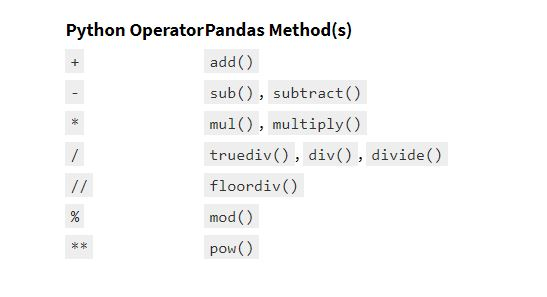

Indexleme işlemini uzun uzun tanımlamak istemiyorsak şöyle kısa bir yol da izlenebilir.

In [ ]:
B = pd.DataFrame(rand.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,1,7,5
1,1,4,0
2,9,5,8


# Handling Missing Data

**Conventions**

Bir tabloda eksik verileri gizlemek için kullanılan yöntemlerden biri de Conventions'dır.
Bu durumda eksik veri yerine bir değer atanarak boş değer maskelenir.

In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [ ]:
#vals1.sum()
#Bu kod çalıştırıldğında nan değerden ötürü hata verecektir. 

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
np.nansum(vals2)
#Böyle bir kod yazdığımızda ise hata almayız çünkü nan değer np.nan değerindedir

8.0

Bunun NaNözellikle bir kayan nokta değeri olduğunu unutmayın; tamsayılar, dizeler veya diğer türler için eşdeğer bir NaN değeri yoktur.

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Pandas veri yapılarında boş değerleri tespit etmek, kaldırmak ve değiştirmek için birkaç yararlı yöntem vardır. 

isnull(): Eksik değerleri gösteren bir boole maskesi oluşturun
notnull(): Tam tersi isnull()
dropna(): Verilerin filtrelenmiş bir sürümünü döndürür
fillna(): Doldurulmuş veya atanmış eksik değerlere sahip verilerin bir kopyasını döndür

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])

In [ ]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [ ]:
#dropna() NaN değerlerini kaldırır.
#fillna() NaN değerlerini doldurur
data.dropna()

0        1
2    hello
dtype: object

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [ ]:
df.fillna(0)

,0,1,2
0,1.0,0.0,2
1,2.0,3.0,5
2,0.0,4.0,6


In [ ]:
data.fillna(method='ffill')
#Boşlukları bir önceki değerle doldurur

0        1
1        1
2    hello
3    hello
dtype: object

In [ ]:
data.fillna(method='bfill')
#Boşlukları bir sonraki değerle doldurur

0        1
1    hello
2    hello
3     None
dtype: object

#Hierarchical Indexing

Bu bölümde, MultiIndex nesnelerinin doğrudan oluşturulmasını inceleyeceğiz

##Bad Way

İki farklı yıla ait eyaletlerle ilgili verileri izlemek istediğinizi varsayalım.

In [ ]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

Bu indexlenmiş şemada slicing işlemi yapabilirsiniz

In [ ]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

Örneğin 2010'daki bir veriye erişmek istediğinizde biraz da uzun ve çetrefilli bir yol seçmek zorundasınız. O yüzden bu kötü yoldur.

In [ ]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

##Better Way: Pandas MultiIndex

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [ ]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Burada her değere karşılık sütunlar olduğu için slicing işlemi daha kolaydır.

In [ ]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

##Yeni Bir Boyutta MultiIndex

Bu durumda unstack() metodunu kulanacağız

In [ ]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


stack() metodu ise unstack() metodunun tam tersi işlem yapar.

In [ ]:
pop_df.stack()

California  2000  total      33871648
                  under18     9267089
            2010  total      37253956
                  under18     9284094
New York    2000  total      18976457
                  under18     4687374
            2010  total      19378102
                  under18     4318033
Texas       2000  total      20851820
                  under18     5906301
            2010  total      25145561
                  under18     6879014
dtype: int64

Pop ile pandas dataframe haline dönüştürdüğümüz veri setimize yeni sütun ekleyebiliriz.

In [ ]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [ ]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


##MultiIndex DataFrame oluşturmak

In [ ]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.777681  0.084031
  2  0.287928  0.789941
b 1  0.045150  0.858984
  2  0.620577  0.769541

Benzer olarak bir tuple'ın key olarak kullanıldığı bir dictionary yapısını da multiindex hale getirebiliriz

In [ ]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

Daha esnek indexleme işlemleri için daha önce yaptığımız gibi pd.MultiIndex yapıları oluşturabiliriz

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Tuple halindeki verilerle de pd.MultiIndex kullanabiliriz

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Kartezyen çarpımı kullanarak da MultiIndex yapısını oluşturabiliriz

In [ ]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

**MultiIndex level names**

In [ ]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

**MultiIndex sütunlar**

Satırlarda olabildiği gibi sütunlar da çok sayıda olabilir. Şimdi gerçekçi bir sağlık verisini inceleyeceğiz

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      36.0  35.8  50.0  36.0  18.0  35.8
     2      36.0  37.1  18.0  36.8  34.0  37.7
2014 1      27.0  37.3  47.0  36.6  37.0  36.1
     2      45.0  36.3  38.0  38.9  37.0  37.8

Veride de gördüğümüz gibi satır ve sütunlar multiindex olabilir. 

In [ ]:
health_data['Sue']

type          HR  Temp
year visit            
2013 1      18.0  35.8
     2      34.0  37.7
2014 1      37.0  36.1
     2      37.0  37.8

##Indexing and Slicing a MultiIndex

###**Multiply indexed Series**

In [ ]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop['California', 2000]

33871648

In [ ]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [ ]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [ ]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [ ]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

###**Multiply indexed DataFrames**

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      36.0  35.8  50.0  36.0  18.0  35.8
     2      36.0  37.1  18.0  36.8  34.0  37.7
2014 1      27.0  37.3  47.0  36.6  37.0  36.1
     2      45.0  36.3  38.0  38.9  37.0  37.8

In [ ]:
health_data['Guido', 'HR']

year  visit
2013  1        50.0
      2        18.0
2014  1        47.0
      2        38.0
Name: (Guido, HR), dtype: float64

In [ ]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      36.0  35.8
     2      36.0  37.1

In [ ]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        36.0
      2        36.0
2014  1        27.0
      2        45.0
Name: (Bob, HR), dtype: float64

##Rearranging Multi-Indices

###**Sorted and unsorted indices**

In [ ]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.442025
      2      0.074383
c     1      0.085659
      2      0.024405
b     1      0.525692
      2      0.558065
dtype: float64

Bu veride slicing işlemi yapacakken hata alırız

In [ ]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


Hata mesajından tam olarak anlaşılmasa da, bu MultiIndex'in sıralanmamış olmasının sonucudur. Çeşitli nedenlerden dolayı, kısmi dilimler ve diğer benzer işlemler, içindeki seviyelerin MultiIndexsıralı (yani sözlü) sırada olmasını gerektirir. Bunun için sort_index(), sortlevel() veya sortindex() kullanabiliriz.

In [ ]:
data = data.sort_index()
data

char  int
a     1      0.442025
      2      0.074383
b     1      0.525692
      2      0.558065
c     1      0.085659
      2      0.024405
dtype: float64

In [ ]:
data['a':'b']

char  int
a     1      0.442025
      2      0.074383
b     1      0.525692
      2      0.558065
dtype: float64

###Stacking and unstacking indices

In [ ]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [ ]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


###Index setting and resetting

Hiyerarşik verileri yeniden düzenlemenin bir başka yolu da dizin etiketlerini sütunlara dönüştürmektir. Bunun için reset_index() methodu kullanılabilir.

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [ ]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

##Data Aggregations on Multi-Indices

Daha önce mean(),sum() ve max() gibi methodların Data Aggregations için kullanıldığını gördük. Şimdi verilerin alt kümelerinde bu methodların nasıl kullanıldığını bulmak için level yöntemini kullanacağız

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      36.0  35.8  50.0  36.0  18.0  35.8
     2      36.0  37.1  18.0  36.8  34.0  37.7
2014 1      27.0  37.3  47.0  36.6  37.0  36.1
     2      45.0  36.3  38.0  38.9  37.0  37.8

In [ ]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     36.0  36.45  34.0  36.40  26.0  36.75
2014     36.0  36.80  42.5  37.75  37.0  36.95

#Combining Datasets: Concat and Append

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


DataFrame yapan bir fonksiyon

###**Recall: Concatenation of NumPy Arrays**

İki array birleştirilirken numpy araçları kullanılabilir

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Bu araç iki argüman alır. Birincisinde birleştirilecek liste veya tupleları, ikincisi sonucu birleştireceği eksen değeri

In [ ]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

##Simple Concatenation with pd.concat

np.concatenate sadece arrayler için çalışırken pd.concat() DataFrame ve Series'ler üzerinde de işe yarar

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

Çok boyutluları birleştirmeye de yarar.

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [ ]:
#df3 = make_df('AB', [0, 1])
#df4 = make_df('CD', [0, 1])
#pd.concat([df3, df4], axis='col')

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
pd.concat([x, y])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [ ]:
#Bazen indexin adını göz ardı etmek istersek yazacağımız parametre şudur:
#Bu durumda yeni integer index yaratılır.
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [ ]:
#Birleştirdiğimiz DataFrame'e key eklemek için
pd.concat([x, y], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

In [ ]:
#Bu tarz bir birleştirme yaptığımızda NaN değerler ortaya çıkar.
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [ ]:
#join parametresi NaN değerlerin olduğu sütunu siler
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [ ]:
#pd.concat([df5, df6], join_axes=[df5.columns])

##**The append() method**

In [ ]:
df1.append(df2)

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


append() yöntemi eski veriyi değiştirmez, yeni veri yaratır.

#Combining Datasets: Merge and Join

 pd.merge() çeşitli DataFrame'leri birleştirmeyi sağlar.

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print("\n")
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR


  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [ ]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
#pd.merge iki DataFrame'de de ortak bir employee sütununu tanıyarak DaaFrame'leri birleştirdi

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [ ]:
#pd.merge() birleştireceği iki dataframe'de farklılıkları bulup yeni satır ekleyebilir.
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
pd.merge(df4,df5)

,group,supervisor,skills
0,Accounting,Carly,math
1,Accounting,Carly,spreadsheets
2,Engineering,Guido,coding
3,Engineering,Guido,linux
4,HR,Steve,spreadsheets
5,HR,Steve,organization


##Specification of the Merge Key

pd.merge() için hangi sütunun key olacağını belirlemek mümkündür

In [ ]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print(df1)
print("\n")
print(df2)
print("\n")
pd.merge(df1, df3, left_on="employee", right_on="name")

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR


  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014




,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [ ]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [ ]:
#Bazen sütunda değil indexte birleştirmek isteriz
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1)
print("\n")
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR


  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [ ]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [ ]:
#Join() de benzer bir çalışma şekli gösterir
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [ ]:
#Böyle bir birleştirme gerçekleştirdiğimizde ortak tek kişi Mary olduğu için tek satır ortaya çıkar
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
print(df6)
print("\n")
print(df7)
pd.merge(df6, df7)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread


     name drink
0    Mary  wine
1  Joseph  beer


,name,food,drink
0,Mary,bread,wine


In [ ]:
#Bunu önlemek için...
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [ ]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8)
print("\n")
print(df9)
print("\n")
pd.merge(df8, df9, on="name")

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4


   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2




,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [ ]:
#Sütun isimlerini değiştirerek birleştirebiliriz
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


#Aggregation and Grouping

In [4]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [5]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [7]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [8]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [9]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [10]:
#Bu veri setindeki tümm özellikleri gözlemlemenin kolay yoludur
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


#**Pivot Tables**

In [12]:
titanic = sns.load_dataset('titanic')

In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [16]:
#Böylece hayatta kalanların class ve cinsiyete göre dağılımını dataframe haline getirebilirim
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


***Bunu yaparken çeşitli yöntemler kullanabilirim. Mesela pivot table***

In [17]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [19]:
#pd.cut metoduyla çok boyutlu dataframe şeklinde bir tablo oluşturabiliriz
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [20]:
#Yeni sütunlarla kurmak ve geliştirmek için pd.qcut() metodunu kullanabilririm
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]            ... (14.454, 512.329]          
class                      First    Second  ...            Second     Third
sex    age                                  ...                            
female (0, 18]               NaN  1.000000  ...          1.000000  0.318182
       (18, 80]              NaN  0.880000  ...          0.914286  0.391304
male   (0, 18]               NaN  0.000000  ...          0.818182  0.178571
       (18, 80]              0.0  0.098039  ...          0.030303  0.192308

[4 rows x 6 columns]

In [21]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

#**Vectorized String Operations**

In [22]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']

In [23]:
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [24]:
names = pd.Series(data)
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

In [25]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [26]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

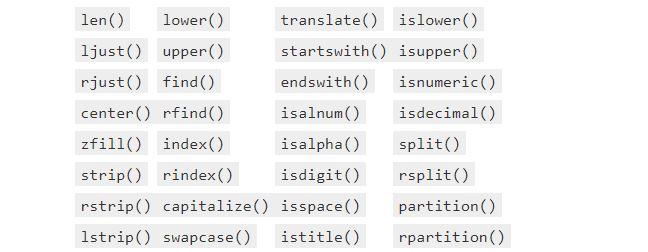

In [27]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [30]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [31]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

***String düzenlerken regex metodlarından da yararlanılabilir***

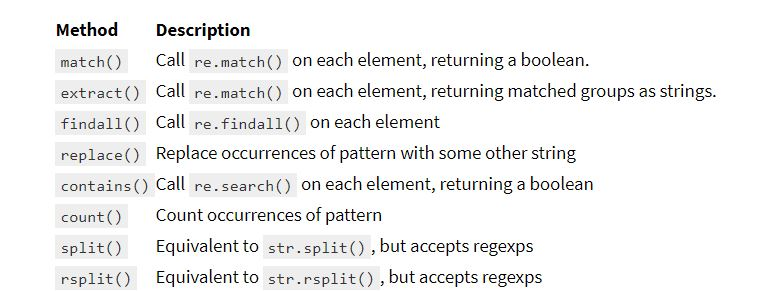

In [33]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

***Stringlerin başında ^ ya da $ gibi işaretler varsa bunları ayıklayabiliriz***

In [34]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

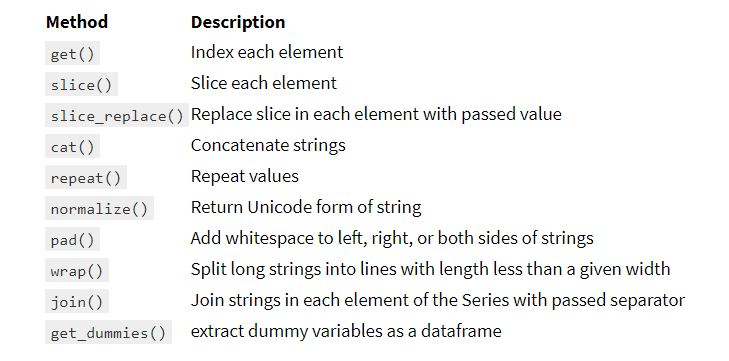

In [35]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [36]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#**Time Series**

In [39]:
from datetime import datetime

In [40]:
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [41]:
from dateutil import parser

In [43]:
#Bu metod string ifadelerden date çıkarabilmemize yarar
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [44]:
date.strftime('%A')
#Bu bir format metodudur. Günü belirler

'Saturday'

***NumPy içinde de zaman metodları vardır ve kullanılabilir***

In [45]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [46]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

***Pandas'da da çeşitli zaman metodları kullanılır***

In [47]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [48]:
date.strftime('%A')

'Saturday'

In [49]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [50]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [51]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64